<a href="https://www.kaggle.com/code/patimejia/visualizing-contrail-false-color-human-mask?scriptVersionId=136348300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[DEBUG] Running main function with base_dir=/kaggle/input/google-research-identify-contrails-reduce-global-warming/train and record_id=1704010292581573769
[DEBUG] Loading numpy array for band: band_11
[DEBUG] Loaded band: band_11 with shape (256, 256, 8)
[DEBUG] Loading numpy array for band: band_14
[DEBUG] Loaded band: band_14 with shape (256, 256, 8)
[DEBUG] Loading numpy array for band: band_15
[DEBUG] Loaded band: band_15 with shape (256, 256, 8)
[DEBUG] Loading numpy array for band: human_pixel_masks
[DEBUG] Loaded band: human_pixel_masks with shape (256, 256, 1)
[DEBUG] Loading numpy array for band: human_individual_masks
[DEBUG] Loaded band: human_individual_masks with shape (256, 256, 1, 4)
[DEBUG] Normalizing band data with bounds: (-4, 2)
[DEBUG] Normalization complete. Data min: -0.8434651494026184, max: 0.6381454467773438
[DEBUG] Normalizing band data with bounds: (-4, 5)
[DEBUG] Normalization complete. Data min: -0.3408440351486206, max: 1.4984571933746338
[DEBUG] Normaliz

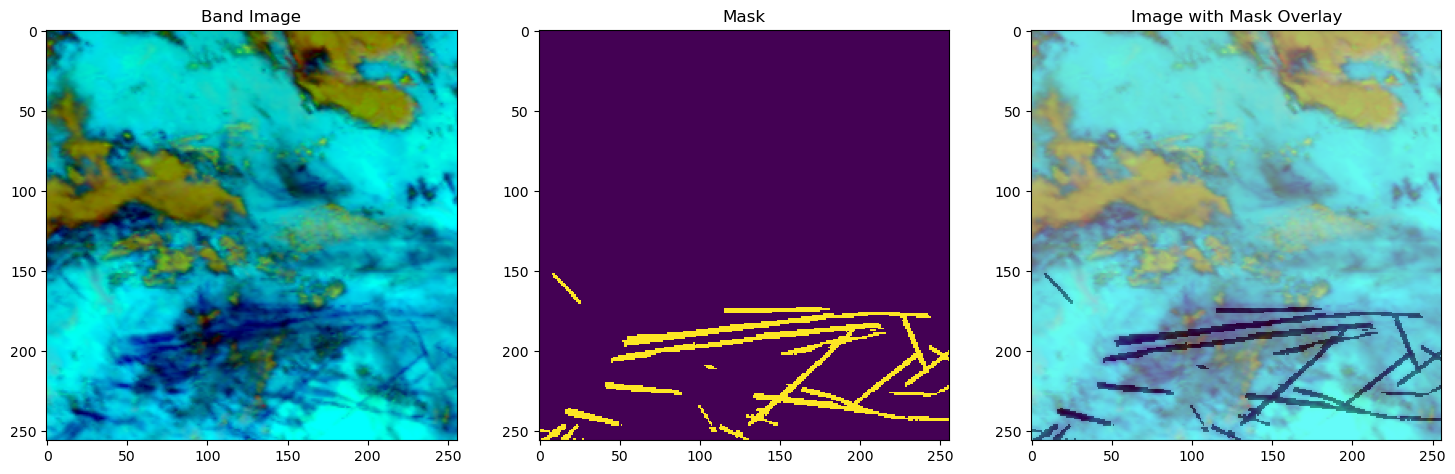

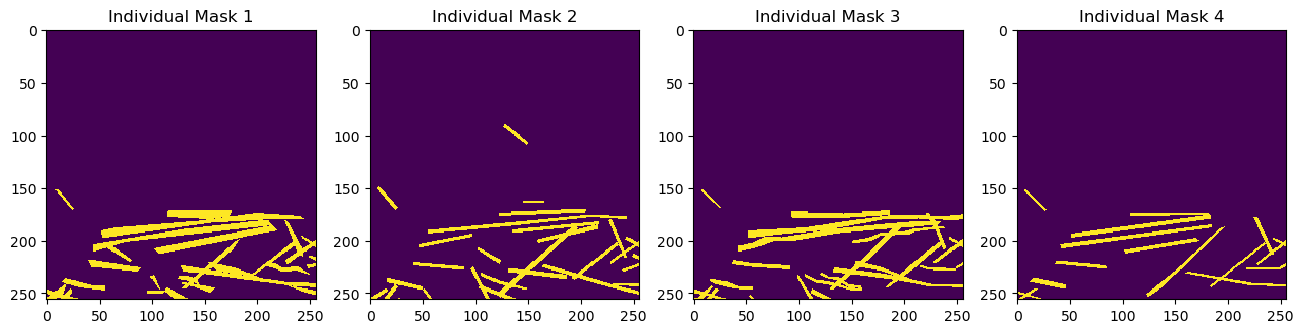

In [1]:
import os
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML

# CONSTANTS
_N_TIMES_BEFORE = 4
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)
_BANDS = ['band_11', 'band_14', 'band_15', 'human_pixel_masks', 'human_individual_masks']

def print_debug(*args):
    # Prints debug messages
    print("[DEBUG]", *args)

def load_band(base_dir, record_id, band):
    # Loads band data from file
    print_debug(f"Loading numpy array for band: {band}")
    band_path = os.path.join(base_dir, record_id, f'{band}.npy')
    with open(band_path, 'rb') as f:
        band_data = np.load(f)
    print_debug(f"Loaded band: {band} with shape {band_data.shape}")
    return band_data

def normalize_band(band_data, bounds):
    # Normalizes band data using given bounds
    print_debug(f"Normalizing band data with bounds: {bounds}")
    normalized_data = (band_data - bounds[0]) / (bounds[1] - bounds[0])
    print_debug(f"Normalization complete. Data min: {normalized_data.min()}, max: {normalized_data.max()}")
    return normalized_data

def display_image(img, mask, individual_masks):
    # Displays image and masks
    print_debug("Displaying image.")
    plt.figure(figsize=(18, 6))

    ax = plt.subplot(1, 3, 1)
    ax.imshow(img)
    ax.set_title('Band Image')

    ax = plt.subplot(1, 3, 2)
    ax.imshow(mask, interpolation='none')
    ax.set_title('Mask')

    ax = plt.subplot(1, 3, 3)
    ax.imshow(img)
    ax.imshow(mask, cmap='Reds', alpha=.4, interpolation='none')
    ax.set_title('Image with Mask Overlay')

    n = individual_masks.shape[-1]
    plt.figure(figsize=(16, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(individual_masks[..., i], interpolation='none')
        plt.title(f'Individual Mask {i+1}')

def animate_image(img):
    # Animates image using matplotlib
    print_debug("Animating image.")
    fig = plt.figure(figsize=(6, 6))
    im = plt.imshow(img[..., 0])

    def draw(i):
        im.set_array(img[..., i])
        return [im]

    anim = animation.FuncAnimation(
        fig, draw, frames=img.shape[-1], interval=500, blit=True
    )
    
    plt.close(fig)
    print_debug("Animation created.")
    return HTML(anim.to_jshtml())

def main(base_dir, record_id):
    # Main function to load and display data
    print_debug(f"Running main function with base_dir={base_dir} and record_id={record_id}")
    
    band11 = load_band(base_dir, record_id, 'band_11')
    band14 = load_band(base_dir, record_id, 'band_14')
    band15 = load_band(base_dir, record_id, 'band_15')
    human_pixel_mask = load_band(base_dir, record_id, 'human_pixel_masks')
    human_individual_mask = load_band(base_dir, record_id, 'human_individual_masks')

    r = normalize_band(band15 - band14, _TDIFF_BOUNDS)
    g = normalize_band(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
    b = normalize_band(band14,_T11_BOUNDS)

    false_color = np.clip(np.stack([r,g,b], axis=2),0 ,1)

    img=false_color[..., _N_TIMES_BEFORE]

    display_image(img,human_pixel_mask,human_individual_mask)
    return animate_image(false_color)

# Call the main function with the base directory and record id as arguments
animation=main('/kaggle/input/google-research-identify-contrails-reduce-global-warming/train','1704010292581573769')
animation

# Acknowledgement
#### • This script is inspired by [INVERSION's notebook on Kaggle](https://www.kaggle.com/code/inversion/visualizing-contrails).
#### • How to create the standard RGB images: [Compilation of RGB Recipes (i.e. Ash RGB)](https://eumetrain.org/sites/default/files/2020-05/RGB_recipes.pdf)
#### • [GitHub: src/utils/contrail_animation](https://github.com/patmejia/contrails-vision/blob/main/src/utils/contrail_animation.py): execute the Python code locally.



**Appendix** 

- **Title:** Atmospheric Gases Absorptivity and Earth's Radiation Emission
- **Subtitle:** Analysis of Absorption and Emission at Different Wavelengths
- **Description:**
  - The image consists of two graphs and a table.
  - The first graph is a line graph showing the absorption of different gases in the atmosphere at different wavelengths.
  - The x-axis represents wavelength in microns and the y-axis represents absorption.
  - The gases represented are O2, O3, N2O, CO2, H2O, and CH4.
  - Shows the amount of radiation emitted by the Earth at different wavelengths.
  - The x-axis represents wavelength in microns and the y-axis represents radiation in watts per square meter.
  - The table shows the color channels used in the IR10.8 and IR12.0 satellite images.
  - It has three columns for color channel, ash RGB range, and temperature range.


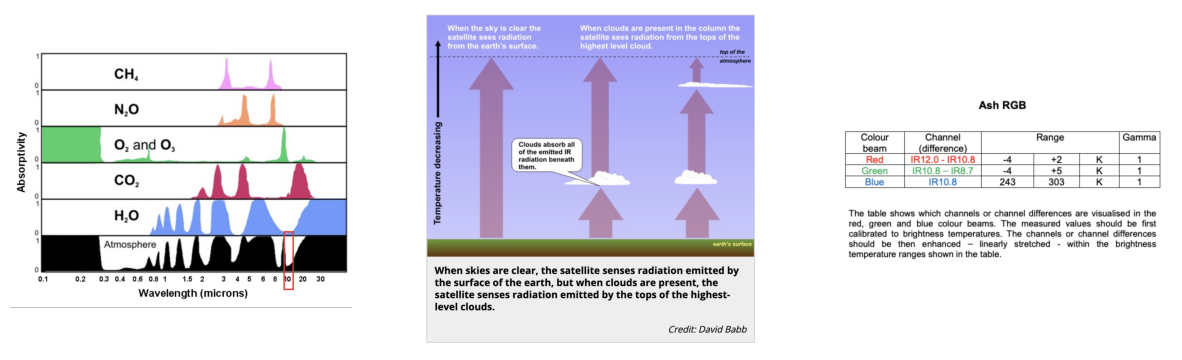

In [2]:
from IPython.display import Image, display, Markdown, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

text = """
**Appendix** 

- **Title:** Atmospheric Gases Absorptivity and Earth's Radiation Emission
- **Subtitle:** Analysis of Absorption and Emission at Different Wavelengths
- **Description:**
  - The image consists of two graphs and a table.
  - The first graph is a line graph showing the absorption of different gases in the atmosphere at different wavelengths.
  - The x-axis represents wavelength in microns and the y-axis represents absorption.
  - The gases represented are O2, O3, N2O, CO2, H2O, and CH4.
  - Shows the amount of radiation emitted by the Earth at different wavelengths.
  - The x-axis represents wavelength in microns and the y-axis represents radiation in watts per square meter.
  - The table shows the color channels used in the IR10.8 and IR12.0 satellite images.
  - It has three columns for color channel, ash RGB range, and temperature range.
"""

display(Markdown(text))

images = ['/kaggle/input/contrail-vision-research-related-images-docs/atmospheric-gases-absorptivity.png',
          '/kaggle/input/contrail-vision-research-related-images-docs/satellite-sensing-radiation.png',
          '/kaggle/input/contrail-vision-research-related-images-docs/ash-rgb.png']

fig, axs = plt.subplots(1, len(images), figsize=(15,5))
for i, image in enumerate(images):
    img = mpimg.imread(image)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()
